   Air temperature [K]  Torque [Nm]  Tool wear [min]
0                298.1         42.8                0
1                298.2         46.3                3
2                298.1         49.4                5
3                298.2         39.5                7
4                298.2         40.0                9
0    0
1    0
2    0
3    0
4    0
Name: Machine failure, dtype: int64
Accuracy: 0.8726666666666667
F1 Score: 0.3129496402877698
Confusion Matrix:
[[2531   12]
 [ 370   87]]


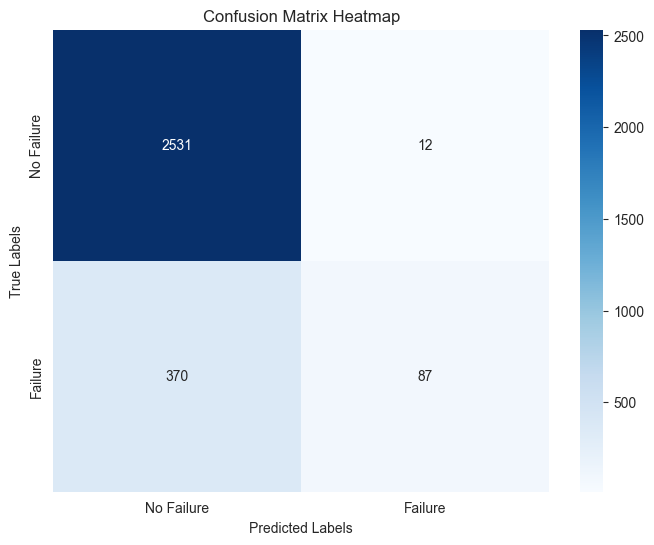

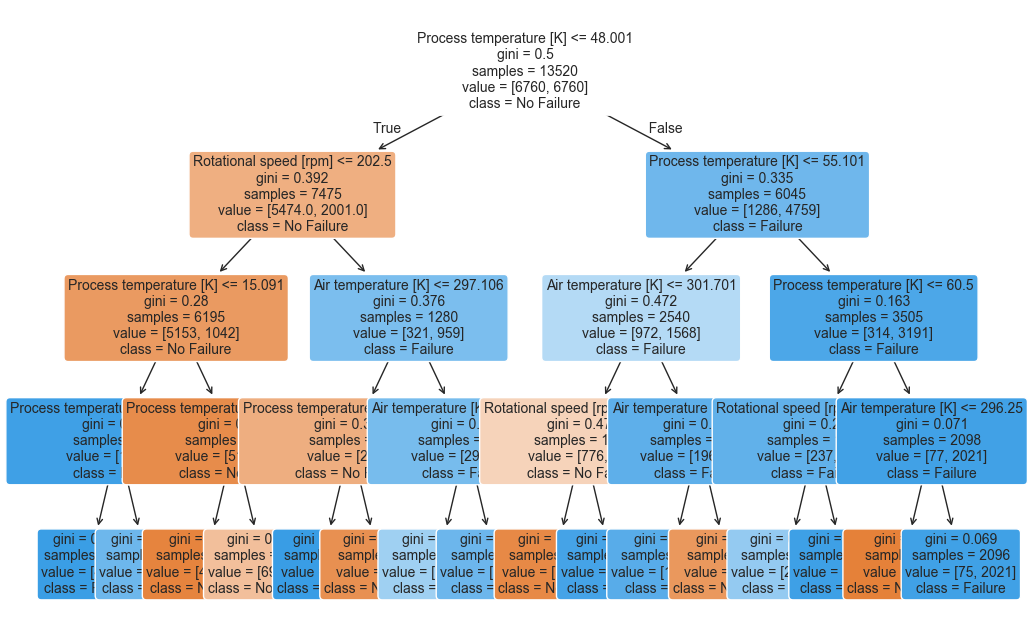

In [23]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
dataset = pd.read_csv("/Users/bhushan/Documents/Python/MachineFailure/dataset/ai4i2020.csv")
simplified_dataset = dataset.drop(columns=['Process temperature [K]', 'Rotational speed [rpm]'])

X = simplified_dataset.drop(columns=['UDI', 'Product ID', 'Type', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
y = dataset['Machine failure']

print(X.head())
print(y.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

clf = DecisionTreeClassifier(random_state=14, max_depth=4, class_weight='balanced')
clf.fit(X_resampled, y_resampled)


# Predict and calculate metrics
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_test, y_pred, average='binary')  # Use 'binary' as the dataset has two classes
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')


cm = confusion_matrix(y_pred, y_test)
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, 
    annot=True,          # Annotate with numbers
    fmt='d',             # Format numbers as integers
    cmap='Blues',        # Use a blue color palette
    xticklabels=['No Failure', 'Failure'],  # Replace with your class names
    yticklabels=['No Failure', 'Failure']   # Replace with your class names
)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Visualize decision tree
plt.figure(figsize=(12, 8))
plot_tree(
    clf,
    feature_names=['Air temperature [K]','Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
    class_names=['No Failure', 'Failure'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()